In [1]:
import seaborn
import lubw

In [2]:
df = lubw.load_raw_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155798 entries, 2008-01-01 01:00:00+01:00 to 2025-10-22 05:00:00+02:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   o3      148316 non-null  float64
 1   no2     150878 non-null  float64
 2   pm10    154930 non-null  float64
 3   pm25    97263 non-null   float64
dtypes: float64(4)
memory usage: 5.9 MB


In [3]:
df

,o3,no2,pm10,pm25
startZeit,,,,
2008-01-01 01:00:00+01:00,0.15,38.31,239.41,NaN
2008-01-01 02:00:00+01:00,0.09,38.30,169.45,NaN
2008-01-01 03:00:00+01:00,1.09,32.03,74.82,NaN
2008-01-01 04:00:00+01:00,2.09,38.02,62.85,NaN
2008-01-01 05:00:00+01:00,21.68,23.26,37.08,NaN
...,...,...,...,...
2025-10-22 01:00:00+02:00,36.00,7.20,2.89,1.78
2025-10-22 02:00:00+02:00,30.36,8.08,3.13,2.04
2025-10-22 03:00:00+02:00,NaN,14.97,3.11,2.03


In [3]:
start_date, end_date = lubw.last_week_range()

In [4]:
lw = lubw.last_week(df)
lw

,startZeit,o3,no2,pm10,pm25
0,2025-06-30 00:00:00+02:00,68.45,10.28,9.69,6.56
1,2025-06-30 01:00:00+02:00,64.81,8.44,9.50,6.40
2,2025-06-30 02:00:00+02:00,55.89,8.19,8.50,6.14
3,2025-06-30 03:00:00+02:00,54.29,7.90,8.78,6.27
4,2025-06-30 04:00:00+02:00,53.46,9.83,9.13,6.35
...,...,...,...,...,...
163,2025-07-06 19:00:00+02:00,109.45,3.14,7.76,3.71
164,2025-07-06 20:00:00+02:00,104.00,3.91,9.18,4.06
165,2025-07-06 21:00:00+02:00,93.24,2.92,10.07,3.94
166,2025-07-06 22:00:00+02:00,81.58,2.02,10.08,3.51


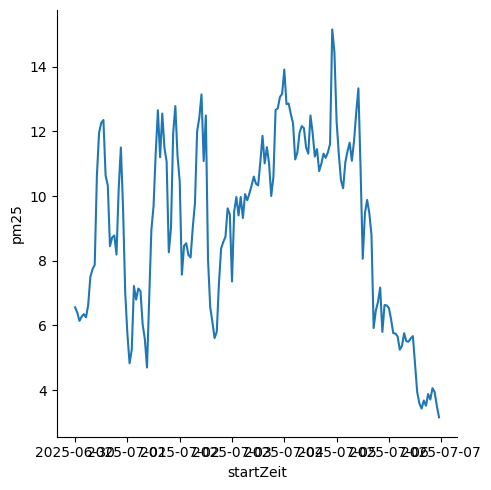

In [5]:
seaborn.relplot(
    kind="line",
    data=lw,
    x="startZeit",
    y="pm25",
)
# On the dashboard, we probably want to take an entire week, from monday to sunday. And maybe fixate it.

In [6]:
weekly = lubw.weekly_stats(df)
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week_start   915 non-null    object 
 1   week_ending  915 non-null    object 
 2   o3_mean      914 non-null    float64
 3   o3_median    914 non-null    float64
 4   o3_min       914 non-null    float64
 5   o3_max       914 non-null    float64
 6   no2_mean     914 non-null    float64
 7   no2_median   914 non-null    float64
 8   no2_min      914 non-null    float64
 9   no2_max      914 non-null    float64
 10  pm10_mean    914 non-null    float64
 11  pm10_median  914 non-null    float64
 12  pm10_min     914 non-null    float64
 13  pm10_max     914 non-null    float64
 14  pm25_mean    569 non-null    float64
 15  pm25_median  569 non-null    float64
 16  pm25_min     569 non-null    float64
 17  pm25_max     569 non-null    float64
dtypes: float64(16), object(2)
memory usage: 128.8+ KB


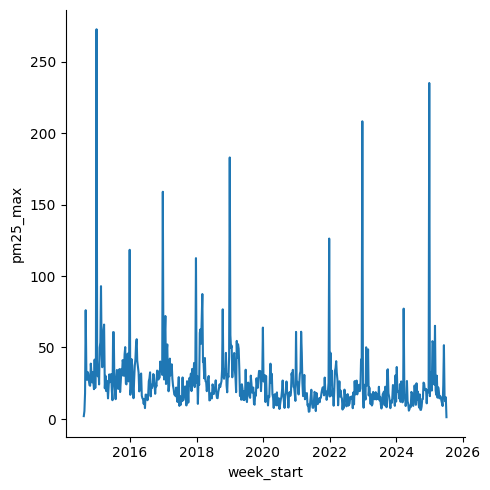

In [7]:
seaborn.relplot(
    kind="line",
    data=weekly,
    x="week_start",
    y="pm25_max",
)

In [8]:
moy = lubw.month_of_year_stats(df)
moy

,month,month_name,o3_mean,o3_median,o3_min,o3_max,no2_mean,no2_median,no2_min,no2_max,pm10_mean,pm10_median,pm10_min,pm10_max,pm25_mean,pm25_median,pm25_min,pm25_max
0,1,January,30.476409,28.330,0.00,89.37,26.353926,24.540,0.21,111.62,20.054677,15.940,0.25,745.31,12.913709,10.050,0.13,272.73
1,2,February,35.740593,36.450,-0.55,109.21,27.875660,25.180,0.00,119.28,23.284130,19.035,-0.33,132.86,14.838460,11.495,0.18,92.91
2,3,March,49.300296,52.630,0.00,125.89,23.073795,19.170,0.00,110.90,21.924847,18.260,0.32,265.35,13.819819,10.600,0.20,87.41
3,4,April,64.209562,65.840,0.01,159.33,18.043243,14.885,0.00,105.34,17.007719,14.510,0.33,107.04,9.415239,7.770,0.16,52.29
4,5,May,70.199491,68.880,0.05,162.98,12.739760,10.880,0.00,107.37,12.411009,10.960,0.68,78.46,6.735693,5.860,0.30,31.80
5,6,June,75.229895,72.255,5.85,182.90,10.827876,9.340,0.08,73.99,13.022151,11.580,0.59,80.83,7.235180,6.325,0.41,51.60
6,7,July,74.611347,70.870,1.53,199.46,11.500958,9.750,0.22,85.20,12.906821,11.290,0.61,89.71,6.989733,6.010,0.39,60.75
7,8,August,66.582810,63.380,0.00,203.17,13.271882,11.280,0.11,95.97,13.033559,11.480,0.25,198.63,7.603043,6.360,0.44,34.27
8,9,September,48.918310,48.005,0.00,155.59,16.463568,13.965,0.34,89.14,14.044335,12.630,0.00,64.91,8.864644,7.620,0.26,76.09
9,10,October,26.441230,22.330,0.00,105.83,20.923480,19.170,0.35,93.16,16.155068,14.260,-0.22,243.01,10.595290,8.930,0.17,76.70


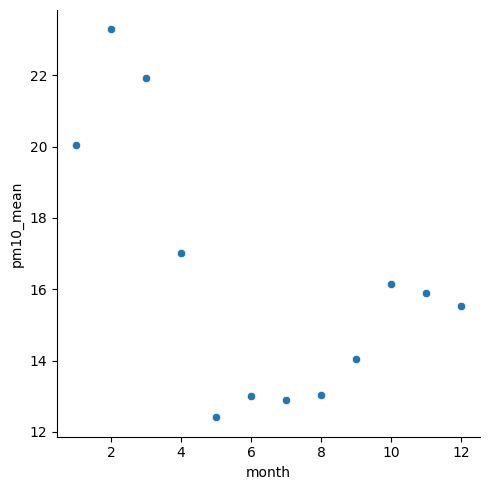

In [9]:
seaborn.relplot(
    data=moy,
    x="month",
    y="pm10_mean",
)

In [10]:
dow = lubw.day_of_week_stats(df)
dow

,day_of_week,day,o3_mean,o3_median,o3_min,o3_max,no2_mean,no2_median,no2_min,no2_max,pm10_mean,pm10_median,pm10_min,pm10_max,pm25_mean,pm25_median,pm25_min,pm25_max
0,0,Mon,49.014560,47.81,0.00,168.58,18.893339,15.55,0.08,96.78,15.081871,12.250,0.28,422.03,9.419910,7.090,0.19,112.53
1,1,Tue,49.048764,48.01,0.00,183.73,19.967615,16.36,0.01,111.62,16.287044,13.120,0.40,745.31,9.995278,7.445,0.18,183.00
2,2,Wed,48.959092,47.48,0.00,197.09,20.551454,17.04,0.02,110.90,17.145361,14.050,0.00,1323.33,10.291756,7.970,0.13,235.12
3,3,Thu,48.440193,46.74,0.00,182.04,20.828809,17.16,0.19,135.26,17.406698,14.165,0.29,646.15,10.348314,8.090,0.23,272.73
4,4,Fri,48.969957,47.21,-0.55,203.17,20.600615,17.03,0.00,119.28,17.051162,14.100,0.27,432.45,10.656897,8.340,0.15,118.36
5,5,Sat,50.142490,49.17,0.00,180.16,18.272869,14.90,0.01,104.85,16.156479,13.260,-0.33,156.43,10.616012,8.475,0.16,126.23
6,6,Son,51.660505,51.35,0.00,180.28,15.610863,12.30,0.04,89.78,14.847372,12.060,-0.25,246.56,9.853374,7.490,0.15,208.31


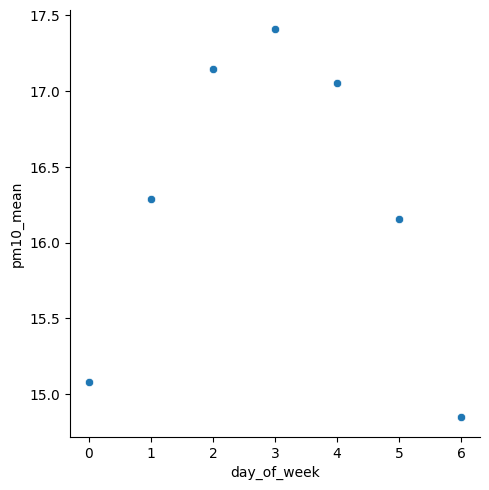

In [11]:
seaborn.relplot(
    data=dow,
    x="day_of_week",
    y="pm10_mean",
)

In [13]:
hod = lubw.hour_of_day_stats(df)
hod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  24 non-null     int32  
 1   o3_mean      24 non-null     float64
 2   o3_median    24 non-null     float64
 3   o3_min       24 non-null     float64
 4   o3_max       24 non-null     float64
 5   no2_mean     24 non-null     float64
 6   no2_median   24 non-null     float64
 7   no2_min      24 non-null     float64
 8   no2_max      24 non-null     float64
 9   pm10_mean    24 non-null     float64
 10  pm10_median  24 non-null     float64
 11  pm10_min     24 non-null     float64
 12  pm10_max     24 non-null     float64
 13  pm25_mean    24 non-null     float64
 14  pm25_median  24 non-null     float64
 15  pm25_min     24 non-null     float64
 16  pm25_max     24 non-null     float64
dtypes: float64(16), int32(1)
memory usage: 3.2 KB


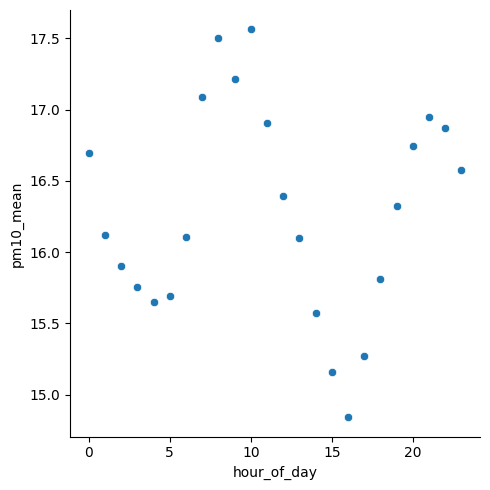

In [14]:
seaborn.relplot(
    data=hod,
    x="hour_of_day",
    y="pm10_mean",
)